In [96]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, calendar
plt.style.use('dark_background')

In [55]:
df = pd.read_csv('clean_df.csv')

In [56]:
df.set_index('Show_Id', inplace = True)

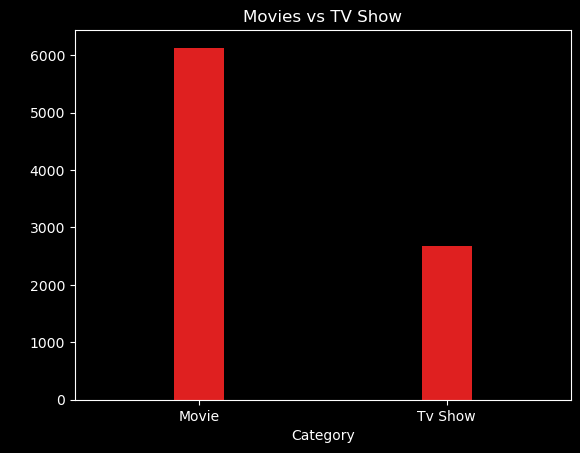

Movies vs Tv Show count:
Type
Movie      6128
Tv Show    2673
Name: count, dtype: int64


In [104]:
sns.countplot(data = df, x = 'Type', color = 'red', width = 0.2)
plt.title('Movies vs TV Show')
plt.xlabel('Category')
plt.ylabel(" ")
plt.show()
print(f"Movies vs Tv Show count:\n{df['Type'].value_counts()}")

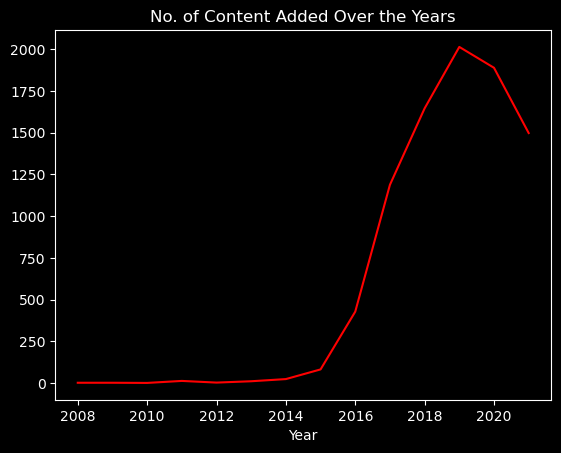

Added_Year
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     428
2017    1188
2018    1646
2019    2014
2020    1889
2021    1498
Name: Title, dtype: int64


In [106]:
year_title_count = df.groupby('Added_Year')['Title'].size()
year_title_count.plot(kind = 'line', title = 'No. of Content Added Over the Years', xlabel = 'Year', color = 'red')
plt.show()
print(df.groupby('Added_Year')['Title'].size())

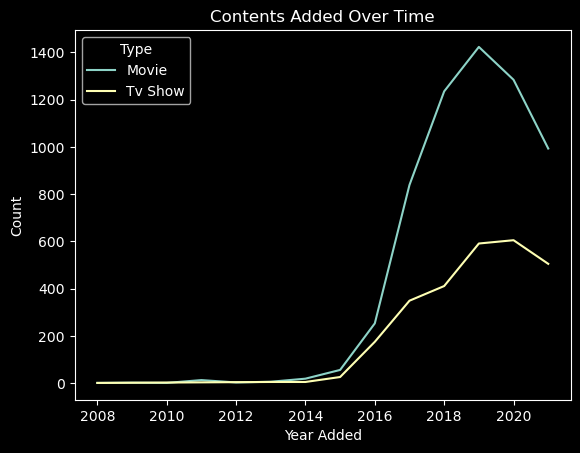

Added_Year  Type   
2008        Movie         1
            Tv Show       1
2009        Movie         2
2010        Movie         1
2011        Movie        13
2012        Movie         3
2013        Movie         6
            Tv Show       5
2014        Movie        19
            Tv Show       5
2015        Movie        56
            Tv Show      26
2016        Movie       253
            Tv Show     175
2017        Movie       839
            Tv Show     349
2018        Movie      1235
            Tv Show     411
2019        Movie      1423
            Tv Show     591
2020        Movie      1284
            Tv Show     605
2021        Movie       993
            Tv Show     505
dtype: int64


In [111]:
counts = df.groupby(['Added_Year', 'Type']).size().reset_index(name='Count')
sns.lineplot(data=counts, x='Added_Year', y='Count', hue = 'Type')
plt.title('Contents Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()
print(df.groupby(['Added_Year', 'Type']).size())

In [60]:
month_order = list(calendar.month_name)[1:]
month_title_count = df.groupby(['Added_Month', 'Added_Year'])['Title'].size().reset_index(name = 'Count')
month_title_count['Added_Month'] = pd.Categorical(month_title_count['Added_Month'], categories = month_order, ordered = True)
month_title_count = month_title_count.sort_values(['Added_Month', 'Added_Year'])

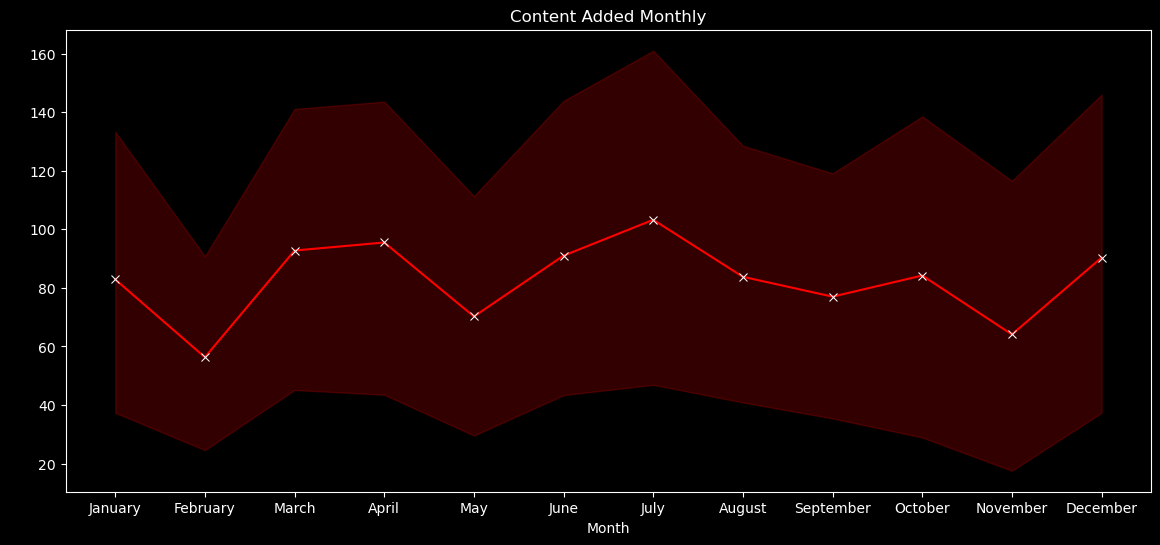

In [115]:
plt.figure(figsize = (14, 6))
sns.lineplot(data = month_title_count, x = 'Added_Month', y = 'Count', color = 'red', marker = 'x')
plt.title('Content Added Monthly')
plt.xlabel('Month')
plt.ylabel(" ")
plt.show()

In [62]:
df2 = pd.read_csv('genre.csv')

Listed_In
International    4097
Name: count, dtype: int64


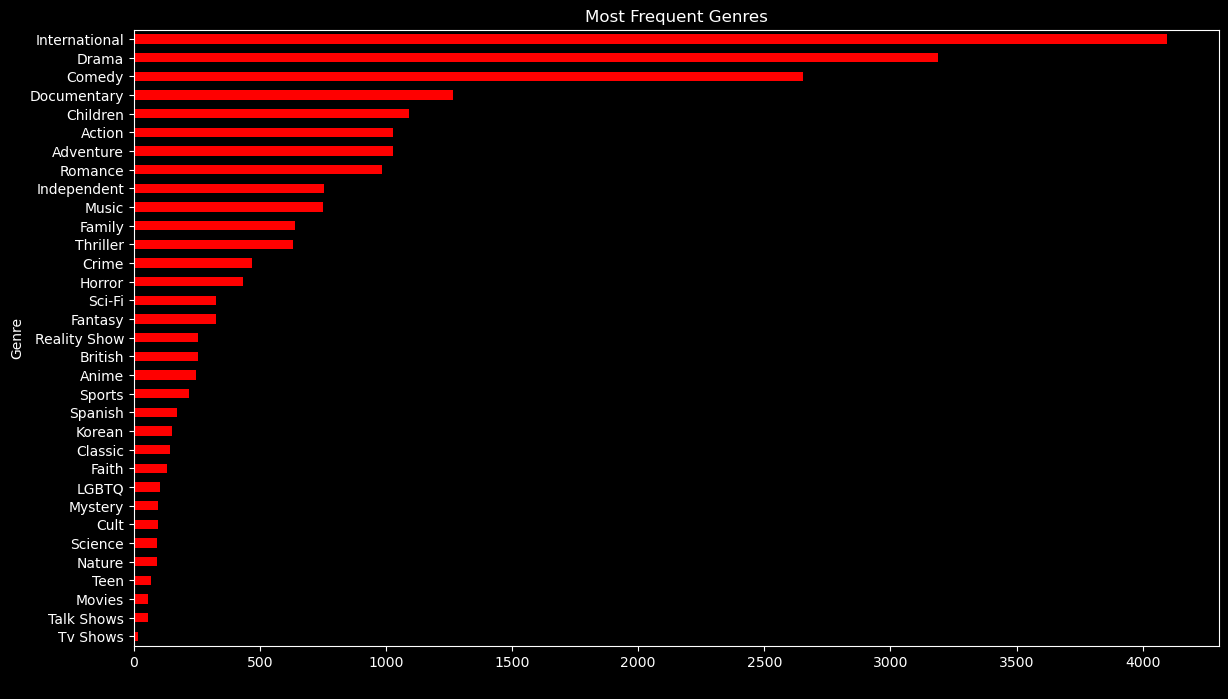

In [116]:
genre_count = df2['Listed_In'].value_counts().sort_values(ascending = True)
genre_count.plot(kind = 'barh', color = 'red', figsize = (14, 8))
plt.title('Most Frequent Genres')
plt.xlabel(' ')
plt.ylabel('Genre')
plt.show
print(genre_count.tail(1))

In [64]:
df3 = pd.read_csv('country.csv')

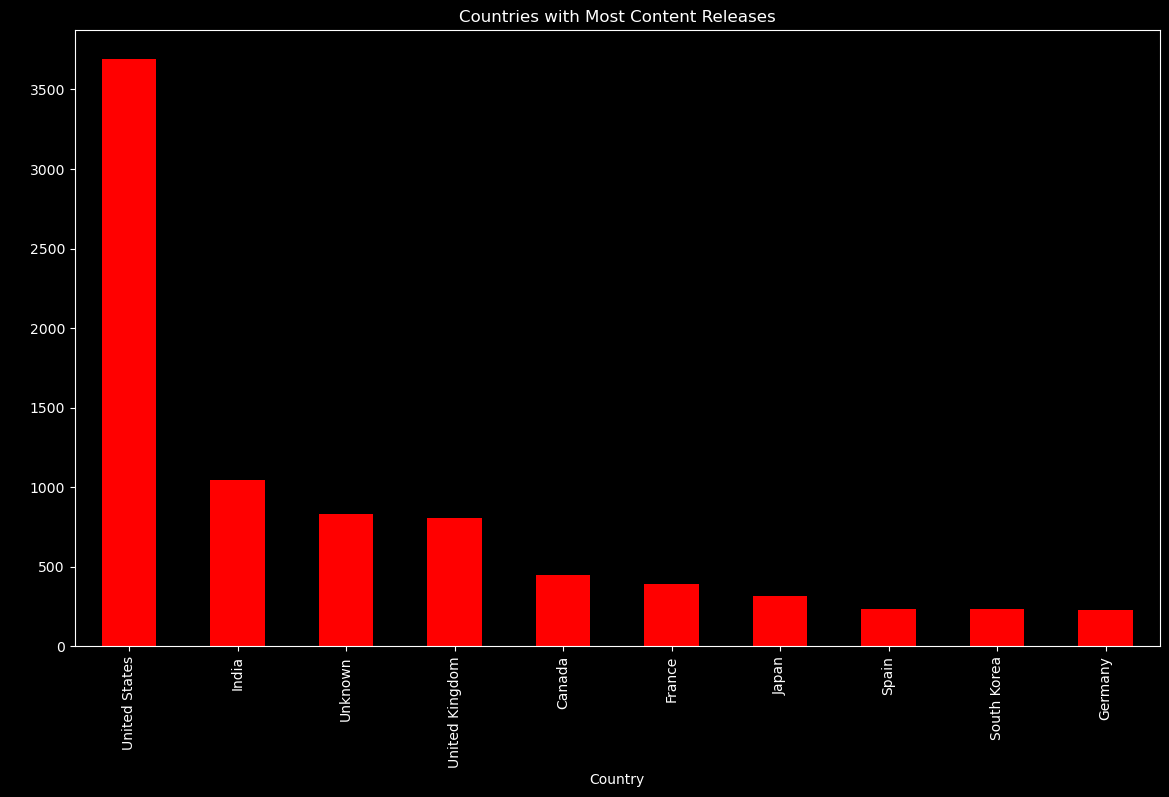

Country
United States     3689
India             1046
Unknown            831
United Kingdom     806
Canada             445
France             393
Japan              316
Spain              232
South Korea        231
Germany            226
Name: count, dtype: int64


In [119]:
country_count = df3['Country'].value_counts().sort_values(ascending = False)
country_count.head(10).plot(kind = 'bar', color = 'red', figsize = (14, 8))
plt.title('Countries with Most Content Releases')
plt.xlabel('Country')
plt.ylabel(' ')
plt.show()
print(country_count.head(10))

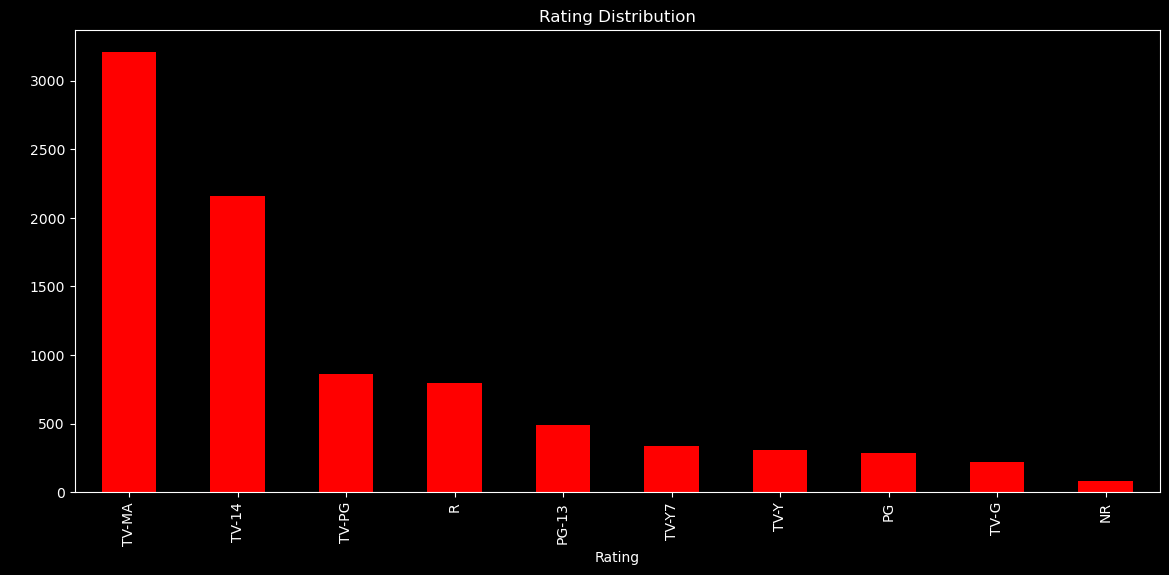

Rating
TV-MA    3208
TV-14    2158
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         79
Name: count, dtype: int64


In [123]:
df4 = pd.read_csv('rating.csv')
rating_count = df4['Rating'].value_counts().sort_values(ascending = False)
rating_count.head(10).plot(kind = 'bar', figsize = (14, 6), color = 'red')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel(' ')
plt.show()
print(rating_count.head(10))

In [74]:
df5 = pd.read_csv('netflix.csv')

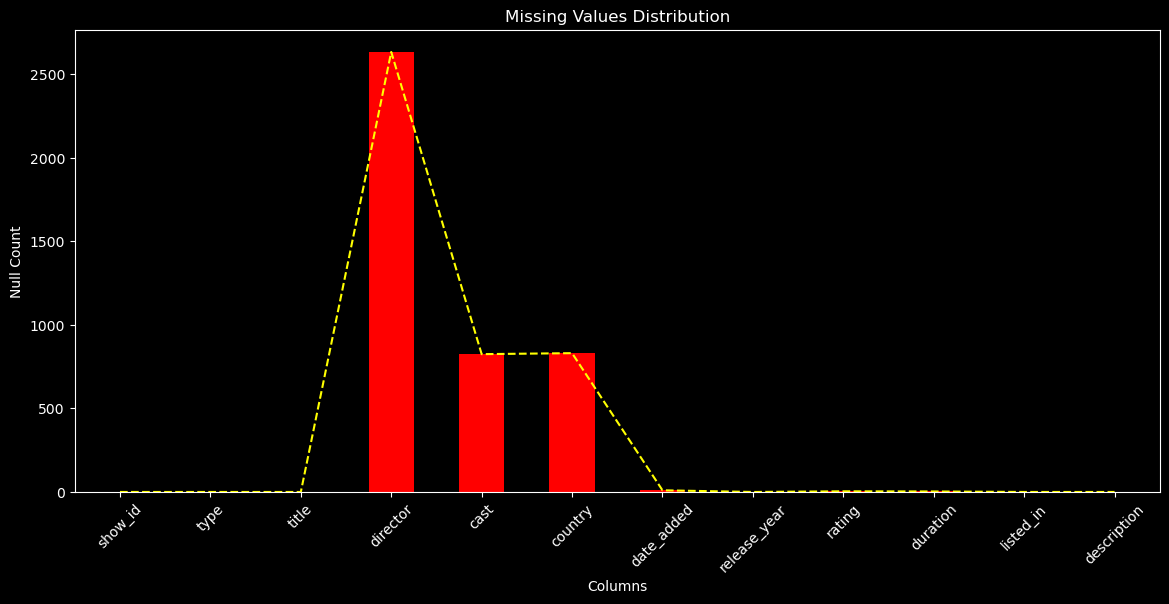

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [130]:
nulls = df5.isna().sum()
nulls.plot(kind = 'bar', figsize = (14,6), color = 'red')
plt.plot(nulls, linestyle = '--', color = 'yellow')
plt.title('Missing Values Distribution')
plt.xlabel('Columns')
plt.ylabel('Null Count')
plt.xticks(rotation =45)
plt.show()
print(nulls)